In [ ]:
import numpy as np 
from scipy import stats
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### **Veri degiskenlerinin aciklanmasi**

**BAD:** BAD değişkeni veri setinde hedef değişkenidir. **'1'** kişinin borcunu zamanında ve usulüne göre yerine getirmediği durum. **'0'** kredi borcunu zamanında ödemiş. 

**LOAN:** Bankadan talep ettiği kredi miktarı 

**MORTDUE:** İpotek için ödemesi gereken tutar

**VALUE:** Müşterinin geçerli mülk değeri

**REASON:** **DebtCont=** diğer borç yükümlülükleri için alınan borç. **HomeImp=** Kişisel ev ihtiyaçları için alınan borç 

**JOB:** Müşterinin meslek (kategorik veri)

**YOJ:** Mevcut mesleğinde kaç yıldır çalışıyor

**DEROG:** Kredi almasını etkileyen önemli zararlı/uygunsuz rapor sayısı

**DELINQ:** Zamanında ödenmemiş kredi sayısı

**CLAGE:** Aylar içinde en eski kredi limitinin yaşı

**NINQ:** Kredi ile ilgili son yapılan sorgu sayısı

**CLNO:** Kredi limitinin sayısı 

**DEBTINC:** Müşterinin borç-gelir oranı 

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Veri-Bilimi-Bootcamp/hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


### **Veri Satir, Sutun ve Veri tipleri hakkinda bilgiler**

In [ ]:
data.shape

(3576, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


Bu kısımda hangi verilerin kategorik hangi verilerin numerik olduğuna dair inceleme gerçekleştirildi. Sonuç olarak 6 tane numerik ve 2 tane kategorik veri bulunmaktadır. 

In [ ]:
name_of_col = list(data.columns)
num_var_list = []
str_var_list = []
drop_col=[]

str_var_list = name_of_col.copy()
for var in name_of_col:
    # check if column belongs to numeric type
    if (data[var].dtypes in (np.int, np.int64, np.uint, np.int32, np.float,
                            np.float64, np.float32, np.double)):
        str_var_list.remove(var)
        num_var_list.append(var)
# drop the omit column from list
for var in drop_col:
    if var in str_var_list:
        str_var_list.remove(var)
    if var in num_var_list:
        num_var_list.remove(var)

print("Numeric Column  :", num_var_list,
      "\nCategoric Column :", str_var_list)

Numeric Column  : ['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc'] 
Categoric Column : ['reason', 'job']


In [ ]:
# Kac farkli kategorik veri bulunmaktadir. 

for i in data.select_dtypes(include=["object"]).columns:
  print(i," ",data[i].value_counts().count())

reason   2
job   6


### **Verinin istatistiksel bilgileri**

Veri seti 3576 satır ve 13 tane sutündan oluşmaktadır. Burada toplamda 12 tane bağımsız ve 1 tane (bad) bağımlı değişken bulunmaktadır. 

- Sutünlar incelendiğinde Loan, MortDue ve Value özniteliklerin sıfırdan farklı minimum değere sahip olduğu, diğerlerinin sıfır veya sıfıra yakın ortalama minimum değere sahip olduğu görülmektedir. 

- Standard Sapmalar incelendiğinde ise aynı şekilde Loan, Mortdue ve Value özniteliklerinin standard sapmalarının oldukça yüksek çıktığı görülmektedir. Bu verilerin ortalamadan uzak yayıldığı görülmektedir. Aynı şekilde incelendiğinde bu üç özniteliğin düzgün dağılmadığı görülmektedir.

- Boş satır kısmında ise bad ve loan öznitelikleri hariç tüm özniteliklerde NULL değer görülmektedir. En çok boş değer 767 ile debtinc'te bulunurken, en az boş değer 64 ile value özniteliğine aittir. 


In [ ]:
desc_df = data.describe().T
range = data.max() - data.min()
null_count = data.isnull().sum()
null_percent = (data.isnull().sum() / data.count())*100
variance = data.var()

desc_df["range"] = round(range,3)
desc_df["null_values"] = round(null_count,3)
desc_df["null__rate"] = round(null_percent,3)
desc_df["variance"] =  round(variance,3)
desc_df

,count,mean,std,min,25%,50%,75%,max,range,null_values,null__rate,variance
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000,1.000,0,0.000,1.600000e-01
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000,88800.000,0,0.000,1.268514e+08
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000,396931.000,314,9.626,1.937482e+09
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000,841200.000,64,1.822,3.010198e+09
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000,41.000,312,9.559,5.727500e+01
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000,10.000,427,13.560,7.490000e-01
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000,15.000,351,10.884,1.208000e+00
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230,1167.740,179,5.269,7.580523e+03
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000,17.000,303,9.258,2.988000e+00
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000,71.000,133,3.863,1.033780e+02


Mgr mesleğine sahip olanların %76,78'i borcunu tam zamanında öderken, %23,21 tam zamanında ödememektedir. 

Office mesleğine sahip olan müşteriler %86,81 gibi yüksek bir oranla borcunu tam zamanında ödemektedir. Sales mesleğine sahip olanlar ise %34,84 gibi en yüksek oranla borcunu geciktirmektedir. 


In [ ]:
bad_class = pd.crosstab(index=data["bad"], columns=data["job"], normalize="columns", margins=True)
bad_class

job,Mgr,Office,Other,ProfEx,Sales,Self,All
bad,,,,,,,
0,0.767896,0.86819,0.767994,0.833116,0.651515,0.704348,0.794955
1,0.232104,0.13181,0.232006,0.166884,0.348485,0.295652,0.205045


 DebtCon işlemleri için kredi alanların %81,44'ü borcunu tam zamanında öderken, %18,55'i tamam zamanında ödememektedir. HomeImp işlemleri için kredi alanların %76,93'ü öderken, %23,06'sı kredi borcunu tam zamanında ödememektedir.


In [ ]:

bad_class = pd.crosstab(index=data["bad"], columns=data["reason"], normalize="columns", margins=True)
bad_class

reason,DebtCon,HomeImp,All
bad,,,
0,0.814424,0.769376,0.800525
1,0.185576,0.230624,0.199475


### **1. Correlation Heat Map**

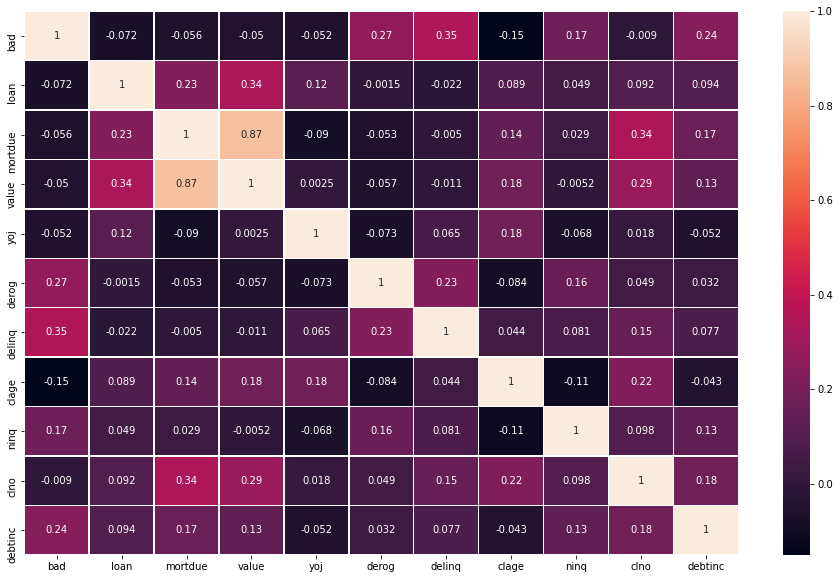

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))        
sns.heatmap(data.corr(), annot=True, linewidths=.3, ax=ax)

Korelasyon ölçeğine baktığımızda -0.15 ve 0.873 arasında dağıldığını görmektedir. Burada **value** ve **mortdue** arasında en yüksek pozitif ilişki olduğu görülmektedir. Dolayısıyla value ve mortdue değişkenleri arasında güçlü bir ilişki olup, biri artarken diğeride artış göstermektedir. 


**clage** ve **bad** arasında -0.15 değeriyle en yüksek negatif ilişki olduğu görülmektedir. Ancak -0.15 değeri negatif yönde düşük bir ilişki olduğunu göstermektedir. 

In [ ]:

print(correlation_df(data).sort_values(by="corr", ascending=False).head(5),"\n")
print(correlation_df(data).sort_values(by="corr", ascending=True).head(5))

    feature1 feature2      corr
35     value  mortdue  0.873280
25   mortdue    value  0.873280
66    delinq      bad  0.345548
6        bad   delinq  0.345548
101     clno  mortdue  0.340139 

   feature1 feature2      corr
77    clage      bad -0.150367
7       bad    clage -0.150367
95     ninq    clage -0.113367
85    clage     ninq -0.113367
46      yoj  mortdue -0.089949


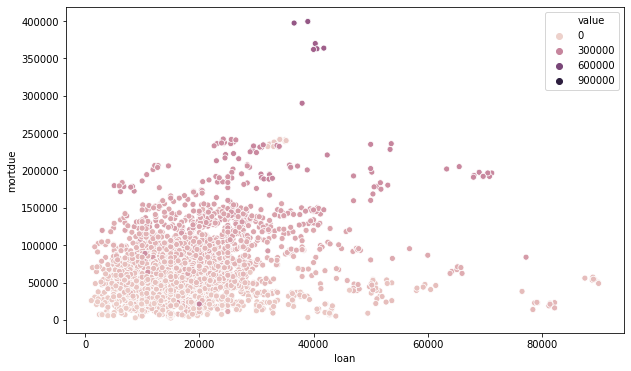

In [117]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.scatterplot(x="loan", y="mortdue", hue="value", data=data, ax=ax)

Value ve mortdue incelendiğinnde 0.87 korelasyona sahip oldukları görülmektedir. Biri artarken diğerininde arttığı görülmektedir. Bunu scatterplot grafiğinden inceleyebiliriz.

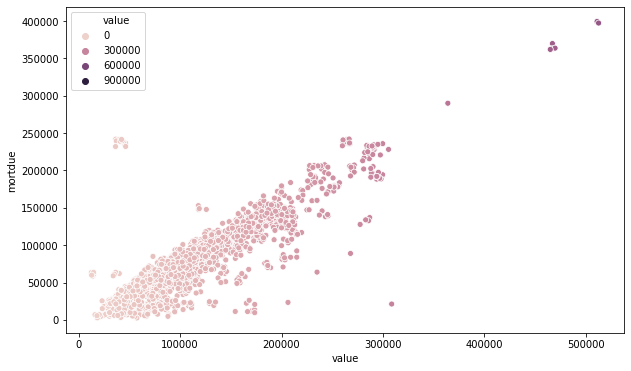

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.scatterplot(x="value", y="mortdue", hue="value", data=data, ax=ax)

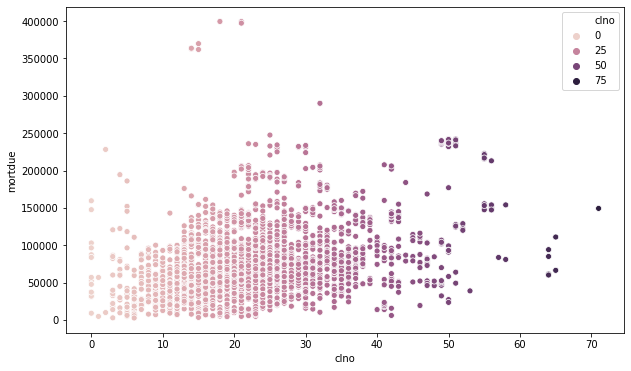

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.scatterplot(x="clno", y="mortdue", hue="clno", data=data,ax=ax)

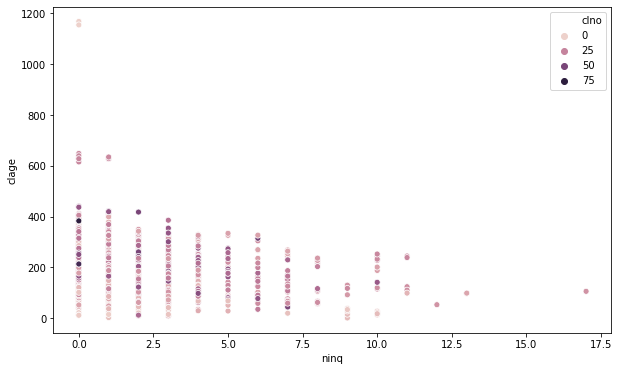

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.scatterplot(x="ninq", y="clage", hue="clno", data=data, ax=ax)

## **2. Box Plot**

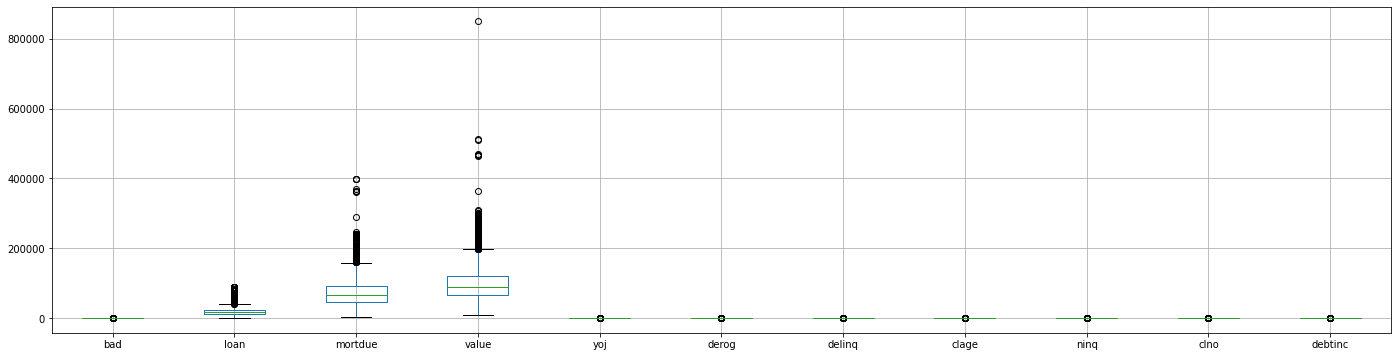

In [ ]:
plt.figure(figsize=(24,6))
data.boxplot()
plt.show()

Boxplot grafikleri incelendiğinde Loan, Mortdue ve value özniteliklerinin five summary değerlerini en iyi özetlediği görülmektedir. 
Bu üç öznitelikten büyük median, minimum ve maximum değerlere sahip value özniteliği olduğu görülmektedir. Value özniteliğinden sonra büyükten küçüğe doğru mortdue ve loan özniteliklerinin geldiği görülmektedir. 
- Ancak bu üç değişkende yüksek sayıda aykırı (outlier) değerlerin olduğu görülmektedir. 

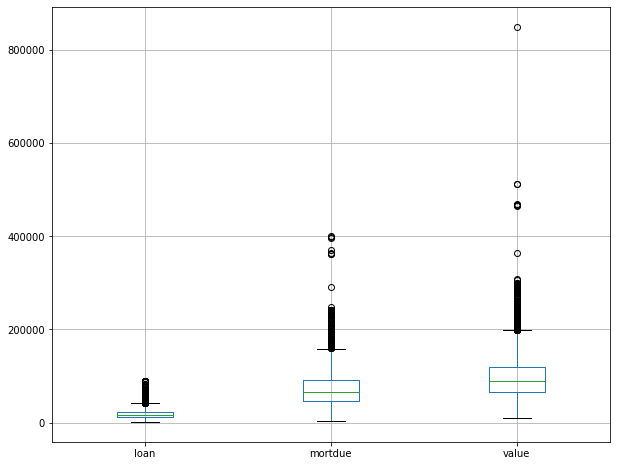

In [ ]:
plt.figure(figsize=(10,8))
boxplot_df = data[["loan", "mortdue","value"]]
boxplot_df.boxplot()
plt.show()

## **3. Histogram Chart**

11 tane öznitelik dağılımları incelendiğinde, loan, mortdue, dno, dage ve yoj özniteliklerinin dağıldığı görülmektedir. Bu verilerin ortak özelliği ise sola doğru çarpık (left skewed) dağılım göstermeleridir. 

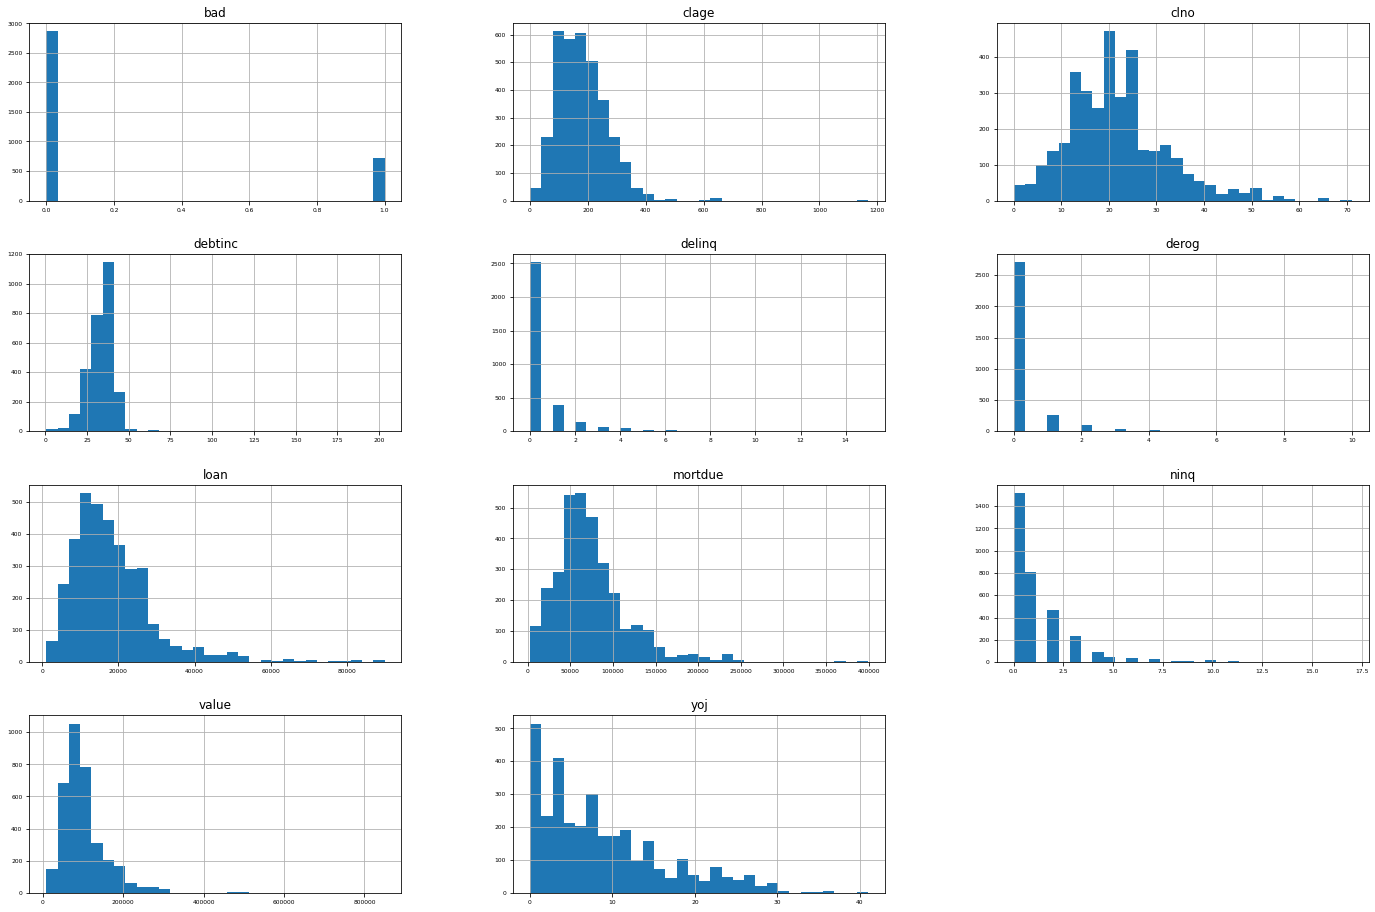

In [ ]:
data.hist(figsize=(24,16), bins=30, xlabelsize=6, ylabelsize=6)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


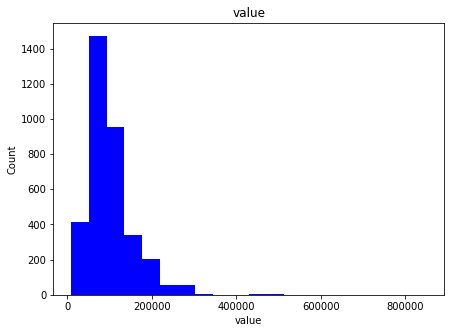

In [ ]:
plt.figure(figsize = (7, 5)) 
x = data["value"] 
plt.hist(x, bins=20, color="blue")
plt.title("value") 
plt.xlabel("value") 
plt.ylabel("Count") 
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


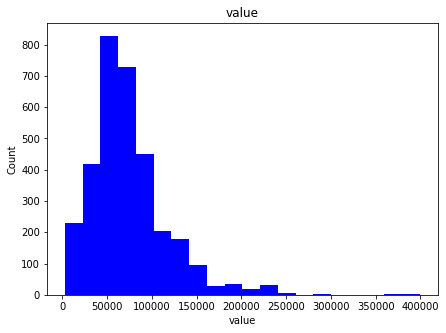

In [ ]:
plt.figure(figsize = (7, 5)) 
x = data["mortdue"] 
plt.hist(x, bins=20, color="blue")
plt.title("value") 
plt.xlabel("value") 
plt.ylabel("Count") 
plt.show()

## **4. Bar Plot (Target Variable)**

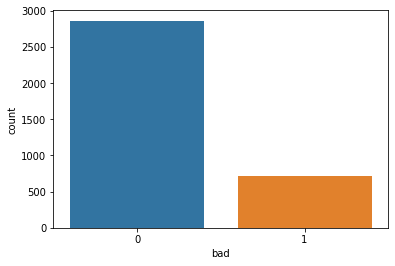

In [ ]:
sns.countplot(x="bad", data=data)

Mesleklere göre borç ödeme hedef değişken sayısı incelendiğinde en yüksek bad=0 değerine Other meslek grubu sahipken, yine aynı şekilde en yükse bad=1 değerinede sahiptir. 

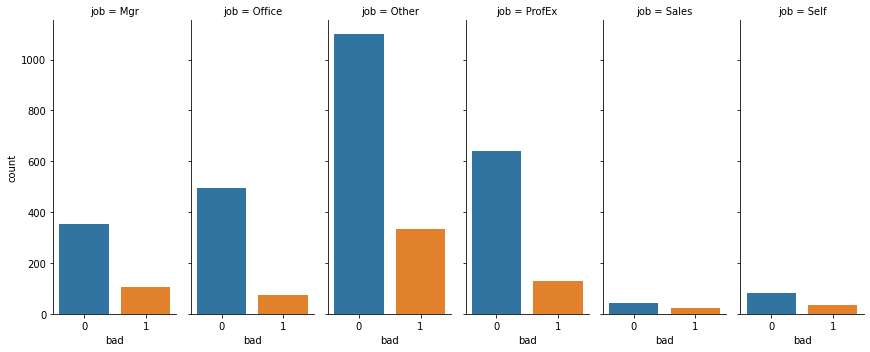

In [ ]:
g = sns.catplot(x="bad", col="job", data=data, kind="count", aspect=.4)

Borç alma nedenine göre veriler incelendiğinde, diğer yükümlülükler için borç alan müşterilerin borcunu zamanında ödediği görülmektedir. Aynı şekilde DebtCon nedenine sahip müşterilerin borcunu en fazla geciktirdiğide görülmektedir.

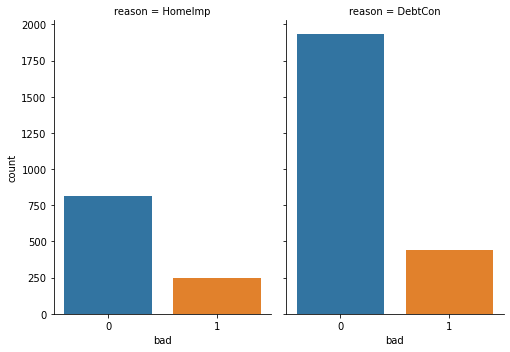

In [ ]:
g = sns.catplot(x="bad", col="reason", data=data, kind="count", aspect=.7)

Bu grafikte ise meslek grupları ve nedenlerine göre borcu ödeme oranları incelenmektedir. 

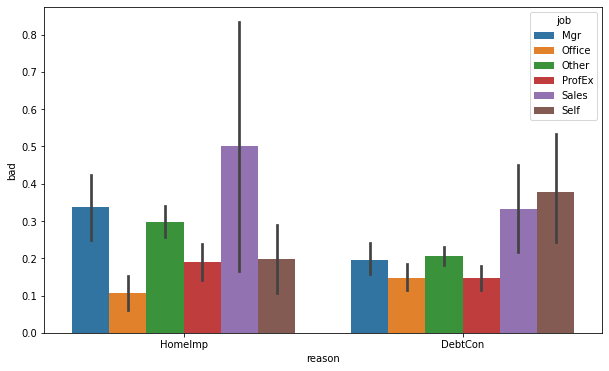

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.barplot(x="reason", y="bad", hue="job", data=data, ax=ax)

## 5. **Pie Chart**

Pasta grafiği ile mesleklerin yüzdelik oranları görselleştirilmiştir. 

- Other meslek grubu %41.98 gibi bir oranla en yüksek yüzdeliğe sahiptir.

- Sales meslek grubu %1.94 gibi bir oranla en düşük yüzdeliğe sahiptir.

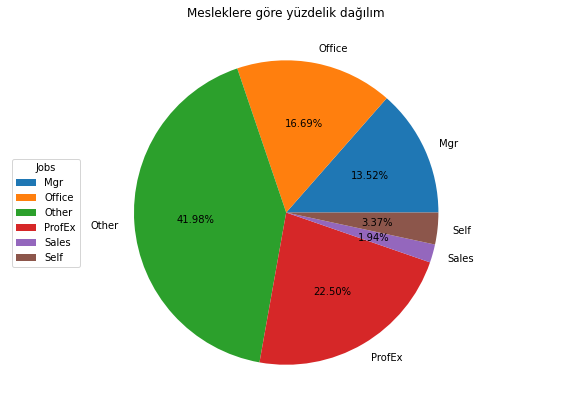

In [ ]:
sums = data.bad.groupby(data.job).count()
fig= plt.figure(figsize=(10,7))
plt.axis('equal');
plt.title("Mesleklere göre yüzdelik dağılım")
plt.pie(sums, labels=sums.index, autopct="%1.2f%%");
plt.legend(title="Jobs", loc="center left")
plt.show()

Pasta grafiği ile kredi alma yüzdelik oranları görselleştirilmiştir. 

- DebtCon denilen diğer borç yükümlülüklerini kapatmak için %69.15 oranla kredi alınmaktadır.
- HomeImp denilen ev ihtiyaçları için %41.98 oranla kredi alınmaktadır.

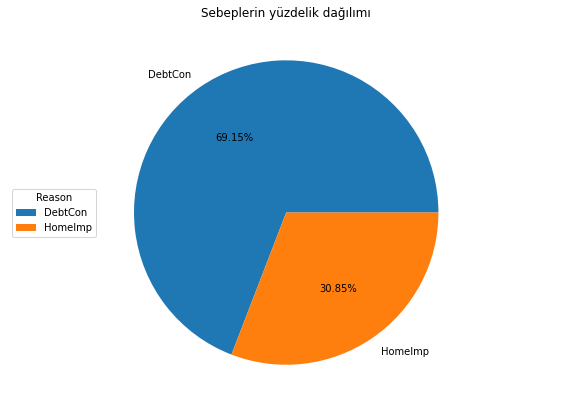

In [ ]:
sums = data.bad.groupby(data.reason).count()
fig= plt.figure(figsize=(10,7))
plt.axis('equal');
plt.title("Sebeplerin yüzdelik dağılımı")
plt.pie(sums, labels=sums.index, autopct="%1.2f%%");
plt.legend(title="Reason", loc="center left")
plt.show()